# **Preparación del dataset**

In [ ]:
# importar datos en google colab
from google.colab import files
shark = files.upload()

Saving GSAF5.csv to GSAF5 (2).csv


In [ ]:
#Importamos librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

In [ ]:
# usamos pd.read_csvp ara crear csv
shark = pd.read_csv('GSAF5.csv', encoding="latin-1")

In [ ]:
shark.head() #corrobooramos que este bien cargado

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2016.09.18.c,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,male,M,16,Minor injury to thigh,N,13h00,NaN,"Orlando Sentinel, 9/19/2016",2016.09.18.c-NSB.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.18.c,2016.09.18.c,5993,NaN,NaN
1,2016.09.18.b,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,Chucky Luciano,M,36,Lacerations to hands,N,11h00,NaN,"Orlando Sentinel, 9/19/2016",2016.09.18.b-Luciano.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.18.b,2016.09.18.b,5992,NaN,NaN
2,2016.09.18.a,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,male,M,43,Lacerations to lower leg,N,10h43,NaN,"Orlando Sentinel, 9/19/2016",2016.09.18.a-NSB.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.18.a,2016.09.18.a,5991,NaN,NaN
3,2016.09.17,17-Sep-16,2016,Unprovoked,AUSTRALIA,Victoria,Thirteenth Beach,Surfing,Rory Angiolella,M,NaN,Struck by fin on chest & leg,N,NaN,NaN,"The Age, 9/18/2016",2016.09.17-Angiolella.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.17,2016.09.17,5990,NaN,NaN
4,2016.09.15,16-Sep-16,2016,Unprovoked,AUSTRALIA,Victoria,Bells Beach,Surfing,male,M,NaN,No injury: Knocked off board by shark,N,NaN,2 m shark,"The Age, 9/16/2016",2016.09.16-BellsBeach.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.16,2016.09.15,5989,NaN,NaN


## *Información del DF Shark.*

In [ ]:
print(type(shark)) #corroboramos la conformación de DF

<class 'pandas.core.frame.DataFrame'>


Tenemos muchos string pocos numericos y algunas de sus varaibles con muchos registros nulos

In [ ]:
shark.info() #información de los datos


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5992 entries, 0 to 5991
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Case Number             5992 non-null   object
 1   Date                    5992 non-null   object
 2   Year                    5992 non-null   int64 
 3   Type                    5992 non-null   object
 4   Country                 5949 non-null   object
 5   Area                    5590 non-null   object
 6   Location                5496 non-null   object
 7   Activity                5465 non-null   object
 8   Name                    5792 non-null   object
 9   Sex                     5425 non-null   object
 10  Age                     3311 non-null   object
 11  Injury                  5965 non-null   object
 12  Fatal (Y/N)             5973 non-null   object
 13  Time                    2779 non-null   object
 14  Species                 3058 non-null   object
 15  Inve

In [ ]:
shark.isnull().sum() #contamos los nulos por variable.

Case Number                  0
Date                         0
Year                         0
Type                         0
Country                     43
Area                       402
Location                   496
Activity                   527
Name                       200
Sex                        567
Age                       2681
Injury                      27
Fatal (Y/N)                 19
Time                      3213
Species                   2934
Investigator or Source      15
pdf                          0
href formula                 1
href                         3
Case Number.1                0
Case Number.2                0
original order               0
Unnamed: 22               5991
Unnamed: 23               5990
dtype: int64

In [ ]:
list(shark.columns) #nombres de las columnas

['Case Number',
 'Date',
 'Year',
 'Type',
 'Country',
 'Area',
 'Location',
 'Activity',
 'Name',
 'Sex ',
 'Age',
 'Injury',
 'Fatal (Y/N)',
 'Time',
 'Species ',
 'Investigator or Source',
 'pdf',
 'href formula',
 'href',
 'Case Number.1',
 'Case Number.2',
 'original order',
 'Unnamed: 22',
 'Unnamed: 23']

# **ETL**






## *Case Number*

En una primera impresión podemos ver que `'Case Number'` es una especie de IDcompuesto de la fecha de acontecimiento y en algunos casos seguidos por otra letra que desconocemos función.

In [ ]:
shark['Case Number'] #consulta de Case Number

0       2016.09.18.c
1       2016.09.18.b
2       2016.09.18.a
3         2016.09.17
4         2016.09.15
            ...     
5987         ND.0005
5988         ND.0004
5989         ND.0003
5990         ND.0002
5991         ND.0001
Name: Case Number, Length: 5992, dtype: object

In [ ]:
shark.rename(columns={'Case Number': 'CaseID'}, inplace=True) #Renombramos la variable
shark.head(3)

,CaseID,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2016.09.18.c,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,male,M,16,Minor injury to thigh,N,13h00,NaN,"Orlando Sentinel, 9/19/2016",2016.09.18.c-NSB.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.18.c,2016.09.18.c,5993,NaN,NaN
1,2016.09.18.b,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,Chucky Luciano,M,36,Lacerations to hands,N,11h00,NaN,"Orlando Sentinel, 9/19/2016",2016.09.18.b-Luciano.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.18.b,2016.09.18.b,5992,NaN,NaN
2,2016.09.18.a,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,male,M,43,Lacerations to lower leg,N,10h43,NaN,"Orlando Sentinel, 9/19/2016",2016.09.18.a-NSB.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.18.a,2016.09.18.a,5991,NaN,NaN


Cuando obtenemos una impresión de los ultimos registros vemos que el ID para fechas inciertas posee la preposición ND para identificarlos.

In [ ]:
shark.tail(5)

,CaseID,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
5987,ND.0005,Before 1903,0,Unprovoked,AUSTRALIA,Western Australia,Roebuck Bay,Diving,male,M,NaN,FATAL,Y,NaN,NaN,"H. Taunton; N. Bartlett, p. 234",ND-0005-RoebuckBay.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0005,ND.0005,6,NaN,NaN
5988,ND.0004,Before 1903,0,Unprovoked,AUSTRALIA,Western Australia,NaN,Pearl diving,Ahmun,M,NaN,FATAL,Y,NaN,NaN,"H. Taunton; N. Bartlett, pp. 233-234",ND-0004-Ahmun.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0004,ND.0004,5,NaN,NaN
5989,ND.0003,1900-1905,0,Unprovoked,USA,North Carolina,Ocracoke Inlet,Swimming,Coast Guard personnel,M,NaN,FATAL,Y,NaN,NaN,"F. Schwartz, p.23; C. Creswell, GSAF",ND-0003-Ocracoke_1900-1905.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0003,ND.0003,4,NaN,NaN
5990,ND.0002,1883-1889,0,Unprovoked,PANAMA,NaN,"Panama Bay 8ºN, 79ºW",NaN,Jules Patterson,M,NaN,FATAL,Y,NaN,NaN,"The Sun, 10/20/1938",ND-0002-JulesPatterson.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0002,ND.0002,3,NaN,NaN
5991,ND.0001,1845-1853,0,Unprovoked,CEYLON (SRI LANKA),Eastern Province,"Below the English fort, Trincomalee",Swimming,male,M,15,"FATAL. ""Shark bit him in half, carrying away t...",Y,NaN,NaN,S.W. Baker,ND-0001-Ceylon.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0001,ND.0001,2,NaN,NaN


In [ ]:
shark.CaseID.count() #contamos 5992 registros

5992

In [ ]:
shark.CaseID.isnull().sum() #recordemos que 'Case ID' no posee nulos

0

Vemos que hay 5976 casos unicos de 5992 registors, por lo tanto deben existir registros repetidos, entonces debemos que ver que sucede con ellos.

In [ ]:
shark.CaseID.describe() 

count           5992
unique          5976
top       1983.06.15
freq               2
Name: CaseID, dtype: object

Utilizamos el registro anterior como ejmplo y cunado lo analizamos en el Datset original, verificamos que se tranta de dos ataques distintos, por como se conforman las columnas

In [ ]:
shark[shark.CaseID == '2014.08.02'] # uno de los id repetidos

,CaseID,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
300,2014.08.02,02-Aug-14,2014,Unprovoked,USA,Florida,"South of Cocoa Beach, Brevard County",Surfing,male,M,50s,Foot bitten,N,NaN,NaN,"Florida Today, 8/8/2014",2014.08.08-CocoaBeach.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2014.08.02,2014.08.02,5692,NaN,NaN
301,2014.08.02,02-Aug-14,2014,Unprovoked,USA,Florida,"Table Beach, Brevard County",Boogie boarding,Christian Sanhueza,M,8,Laceration to ankle,N,13h00,NaN,"Florida Today, 8/2/2014",2014.08.02-Sanhueza.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2014.08.02,2014.08.02,5691,NaN,NaN


In [ ]:
# se trata de dos atacas disitntos, difieran la columna "name" y "activity", entre otros
shark.loc[shark['Name'] == 'Christian Sanhueza', 'CaseID'] = '2014.08.02.R' #lo modificamos con un "R" al final
shark[shark.CaseID == '2014.08.02'] # comprobamos que este ok

,CaseID,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
300,2014.08.02,02-Aug-14,2014,Unprovoked,USA,Florida,"South of Cocoa Beach, Brevard County",Surfing,male,M,50s,Foot bitten,N,NaN,NaN,"Florida Today, 8/8/2014",2014.08.08-CocoaBeach.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2014.08.02,2014.08.02,5692,NaN,NaN


In [ ]:
shark[shark.CaseID == '2014.08.02.R'] # comprobamos que este ok

,CaseID,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
301,2014.08.02.R,02-Aug-14,2014,Unprovoked,USA,Florida,"Table Beach, Brevard County",Boogie boarding,Christian Sanhueza,M,8,Laceration to ankle,N,13h00,NaN,"Florida Today, 8/2/2014",2014.08.02-Sanhueza.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2014.08.02,2014.08.02,5691,NaN,NaN


In [ ]:
shark.CaseID.describe()  #corroboramos que la modificación se haya realizado O, 
#entonces al tirar describe, debio haber subido el n° de casos unicos en 1 unidad
#y como vemos paso de 5976 a 5977

count           5992
unique          5977
top       1983.06.15
freq               2
Name: CaseID, dtype: object

Necesitamos una formula que nos permite rastrear los registros con ID duplicado

In [ ]:
#definición de formula de frecuencias
result = {} #creamos una varaible result, donde se van almacenar los resultados
for item in shark.CaseID: #para cada "item" dentro de la vraible "CaseID" del dataset "shark"
    if item not in result.keys(): #iremos sumando las key que se repitan, cada vez que aparezcan
        result[item] = 1
    else:
        result[item] += 1
result
#devuelve el caso con el numero de frecuencia

{'2016.09.18.c': 1,
 '2016.09.18.b': 1,
 '2016.09.18.a': 1,
 '2016.09.17': 1,
 '2016.09.15': 1,
 '2016.09.15.R': 1,
 '2016.09.11': 1,
 '2016.09.07': 1,
 '2016.09.06': 1,
 '2016.09.05.b': 1,
 '2016.09.05.a': 1,
 '2016.09.04': 1,
 '2016.09.01': 1,
 '2016.08.29.b': 1,
 '2016.08.29.a': 1,
 '2016.08.27': 1,
 '2016.08.25': 1,
 '2016.08.07': 1,
 '2016.08.06': 1,
 '2016.08.04': 1,
 '2016.07.29': 1,
 '2016.07.28.R': 1,
 '2016.07.28': 1,
 '2016.07.27': 1,
 '2016.07.26': 1,
 '2016.07.24': 1,
 '2016.07.23.b': 1,
 '2016.07.23.a': 1,
 '2016.07.20': 1,
 '2016.07.17': 1,
 '2016.07.16.b': 1,
 '2016.07.16.a': 1,
 '2016.07.15': 1,
 '2016.07.14.4': 1,
 '2016.07.08.R': 1,
 '2016.07.08': 1,
 '2016.07.07.b': 1,
 '2016.07.07.a': 1,
 '2016.07.06': 1,
 '2016.07.04': 1,
 '2016.06.27': 1,
 '2016.06.25': 1,
 '2016.06.24': 1,
 '2016.06.23': 1,
 '2016.06.21.b': 1,
 '2016.06.21.a': 1,
 '2016.06.15.b': 1,
 '2016.06.15.a': 1,
 '2016.06.14': 1,
 '2016.06.11': 1,
 '2016.06.07': 1,
 '2016.06.05.b': 1,
 '2016.06.05.a': 1,


In [ ]:
result = pd.DataFrame(result, index=[0]) #vamos a convertirlo en DataFrame y pasarle un indice
result.head(3) #corroboramos

,2016.09.18.c,2016.09.18.b,2016.09.18.a,2016.09.17,2016.09.15,2016.09.15.R,2016.09.11,2016.09.07,2016.09.06,2016.09.05.b,2016.09.05.a,2016.09.04,2016.09.01,2016.08.29.b,2016.08.29.a,2016.08.27,2016.08.25,2016.08.07,2016.08.06,2016.08.04,2016.07.29,2016.07.28.R,2016.07.28,2016.07.27,2016.07.26,2016.07.24,2016.07.23.b,2016.07.23.a,2016.07.20,2016.07.17,2016.07.16.b,2016.07.16.a,2016.07.15,2016.07.14.4,2016.07.08.R,2016.07.08,2016.07.07.b,2016.07.07.a,2016.07.06,2016.07.04,...,ND.0041,ND.0040,ND.0039,ND.0038,ND.0037,ND.0036,ND.0035,ND.0034,ND.0033,ND.0032,ND.0031,ND.0030,ND.0028,ND.0027,ND.0026,ND.0025,ND.0024,ND.0023,ND.0022,ND.0021,ND.0020,ND.0019,ND.0018,ND.0017,ND.0016,ND.0015,ND.0014,ND.0013,ND.0012,ND.0011,ND.0010,ND.0009,ND.0008,ND.0007,ND.0006,ND.0005,ND.0004,ND.0003,ND.0002,ND.0001
0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [ ]:
result = pd.melt(result) #pivotamos la tabla para que nos quede con el formato adecuado
result.head(3) #corroboramos

,variable,value
0,2016.09.18.c,1
1,2016.09.18.b,1
2,2016.09.18.a,1


In [ ]:
result.columns #como vemos los nombres de las columnas no son del todo claras

Index(['variable', 'value'], dtype='object')

In [ ]:
result.rename(columns={'value': 'Freq', 'variable': 'CaseID'}, inplace=True)
result.head(3)
# Renombramos las columnas para operar mejor con ellas

,CaseID,Freq
0,2016.09.18.c,1
1,2016.09.18.b,1
2,2016.09.18.a,1


In [ ]:
CaseID_repetidos = result[result.Freq > 1] 
CaseID_repetidos
#creamos una varaible con los numeros de frecuencia mayores a 1, es decir aquellos ID que se repiten

,CaseID,Freq
392,2013.10.05,2
522,2012.09.02.b,2
838,2009.12.18,2
1209,2006.09.02,2
1371,2005.04.06,2
2404,1990.05.10,2
2706,1983.06.15,2
2830,1980.07.00,2
3309,1966.12.26,2
3579,1962.06.11.b,2


In [ ]:
CaseID_repetidos.count() #5977+15=5992
#como vemos coinciden con el numero obtenido anteriormente al hacer el analisis de casos repetidos

CaseID    15
Freq      15
dtype: int64

In [ ]:
Ids_repetidos = shark[shark['CaseID'].isin(CaseID_repetidos.CaseID)]
Ids_repetidos #creamos otra varaible que nos devuelva todos aquellos valores originales repetidos

,CaseID,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
392,2013.10.05,06-Oct-13,2013,Unprovoked,USA,California,"Bunkers, Humboldt Bay, Eureka, Humboldt County",Surfing,Jay Scrivner,M,45,Laceration to thigh,N,08h45,"White shark, 8' to 10'","R. Collier, GSAF",2013.10.06-Scrivner.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2013.10.05,2013.10.05,5601,NaN,NaN
393,2013.10.05,10-Oct-13,2013,Unprovoked,USA,Florida,"Destin, Okaloosa County",Wading,Zachary Tyke Standridge,M,12,Lacerations to right forearm,N,15h30,Small bull shark,"Monroe County Advocate, 10/9/2013",2013.10.05-Standridge.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2013.10.05,2013.10.05,5600,NaN,NaN
523,2012.09.02.b,02-Sep-12,2012,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Boogie boarding,female,F,8,Puncture wounds to calf and hand,N,18h30,3.5' to 4' shark,"WYTV, 9/3/2012",2012.09.02.b-NSB-girl.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2012.09.02.b,2012.09.02.b,5470,NaN,NaN
524,2012.09.02.b,02-Sep-12,2012,Provoked,USA,Hawaii,"Spreckelsville, Maui",Spearfishing,M. Malabon,NaN,NaN,Minor laceration to hand PROVOKED INCIDENT,N,12h00,"Tiger shark, 10' to 12'",HawaiiNow.com,2012.09.02.c-Malabon.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2012.09.02.b,2012.09.02.b,5469,NaN,NaN
840,2009.12.18,18-Dec-09,2009,Unprovoked,SOUTH AFRICA,Eastern Cape Province,"Second Beach, Port St. Johns",Paddling on kneeboard,Tshintshekile Nduva,M,22,FATAL,Y,14h30,NaN,"B. Jordan & A. Ferreira, Times Live, 12/21/2009",2009.12.18.a-Nduva.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2009.12.18,2009.12.18,5153,NaN,NaN
841,2009.12.18,18-Dec-09,2009,Invalid,SOUTH AFRICA,KwaZulu-Natal,"North Beach, Durban",Surfing,Lance Morris,M,NaN,Minor lacerations to left leg. nitially report...,N,NaN,No shark involvement,"M. Addison, C. Eckstander, GSAF",2009.12.18.b-Morris-barracuda bite.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2009.12.18,2009.12.18,5152,NaN,NaN
1212,2006.09.02,02-Sep-06,2006,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Swimming,male,M,12 or 13,Arm bitten,N,17h55,NaN,"S. Petersohn, GSAF",2006.09.02.b-Child-NSB.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2006.09.02,2006.09.02,4781,NaN,NaN
1213,2006.09.02,02-Sep-06,2006,Unprovoked,SOUTH AFRICA,Western Cape Province,Noordhoek,Surfing,Steven Harcourt-Wood,M,37,"No injury, shark rammed surfboard",N,NaN,"White shark, 3.5m","Cape Times, 9/3/2006",2006.09.02.a-Harcourt-Wood.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2006.09.02,2006.09.02,4780,NaN,NaN
1375,2005.04.06,06-Apr-05,2005,Unprovoked,USA,Florida,"Jacksonville Beach, Duval County",NaN,Jessica Abe,F,NaN,Left calf injured,N,NaN,small hammerhead shark,WJXT News4Jax.com,2005.04.06.a-Abe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2005.04.06,2005.04.06,4618,NaN,NaN
1376,2005.04.06,06-Apr-05,2005,Invalid,HONDURAS,Bay Islands,Utila,SCUBA Diving,female,F,NaN,"Laceration on siide of calf, small laceration ...",N,NaN,Shark involvement not confirmed,"J. Engel, SRI & S. Fox, Deep Blue",2005.04.06.b-Utila.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2005.04.06,2005.04.06,4617,NaN,NaN


Una vez identificados los IDS repetidos podemos analizarlos y ver que inuno de ellos corresponde con un caso repetido, por lo tano debemos modificar cualquier de los casos repetidos agregando una R a final de ellos.

In [ ]:
# modifico los duplicados
shark.loc[shark.index == 301, 'CaseID'] = '2014.08.02.R'
shark.loc[shark.index == 393, 'CaseID'] = '2013.10.05.R'
shark.loc[shark.index == 524, 'CaseID'] = '2012.09.02.b.R'
shark.loc[shark.index == 841, 'CaseID'] = '2009.12.18.R'
shark.loc[shark.index == 1213, 'CaseID'] = '2006.09.02.R'
shark.loc[shark.index == 1376, 'CaseID'] = '2005.04.06.R'
shark.loc[shark.index == 2410, 'CaseID'] = '1990.05.10.R'
shark.loc[shark.index == 2713, 'CaseID'] = '1983.06.15.R'
shark.loc[shark.index == 2838, 'CaseID'] = '1980.07.00.R'
shark.loc[shark.index == 3318, 'CaseID'] = '1966.12.26.R'
shark.loc[shark.index == 3589, 'CaseID'] = '1962.06.11.b.R'
shark.loc[shark.index == 4983, 'CaseID'] = '1923.00.00.a.R'
shark.loc[shark.index == 5029, 'CaseID'] = '1920.00.00.b.R'
shark.loc[shark.index == 5121, 'CaseID'] = '1913.08.27.R.R'
shark.loc[shark.index == 5208, 'CaseID'] = '1907.10.16.R.R'
shark.loc[shark.index == 5091, 'CaseID'] = '1915.07.06.a.R.R'

In [ ]:
shark.CaseID.describe()

count             5992
unique            5992
top       2001.08.18.b
freq                 1
Name: CaseID, dtype: object

# *Country*


A partir de aca decidimos quedarnos solo con las columnas o variables pertinentes a nuestro analisis

In [ ]:
shark.head(3)

,CaseID,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2016.09.18.c,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,male,M,16,Minor injury to thigh,N,13h00,NaN,"Orlando Sentinel, 9/19/2016",2016.09.18.c-NSB.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.18.c,2016.09.18.c,5993,NaN,NaN
1,2016.09.18.b,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,Chucky Luciano,M,36,Lacerations to hands,N,11h00,NaN,"Orlando Sentinel, 9/19/2016",2016.09.18.b-Luciano.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.18.b,2016.09.18.b,5992,NaN,NaN
2,2016.09.18.a,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,male,M,43,Lacerations to lower leg,N,10h43,NaN,"Orlando Sentinel, 9/19/2016",2016.09.18.a-NSB.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.18.a,2016.09.18.a,5991,NaN,NaN


In [ ]:
shark.loc[:, ['CaseID', 'Case Number.1', 'Case Number.2']]
#vemos que se repite información

,CaseID,Case Number.1,Case Number.2
0,2016.09.18.c,2016.09.18.c,2016.09.18.c
1,2016.09.18.b,2016.09.18.b,2016.09.18.b
2,2016.09.18.a,2016.09.18.a,2016.09.18.a
3,2016.09.17,2016.09.17,2016.09.17
4,2016.09.15,2016.09.16,2016.09.15
...,...,...,...
5987,ND.0005,ND.0005,ND.0005
5988,ND.0004,ND.0004,ND.0004
5989,ND.0003,ND.0003,ND.0003
5990,ND.0002,ND.0002,ND.0002


In [ ]:
shark.loc[:, [ 'Unnamed: 22', 'Unnamed: 23']]
#tenemos columnas vacias

,Unnamed: 22,Unnamed: 23
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN
...,...,...
5987,NaN,NaN
5988,NaN,NaN
5989,NaN,NaN
5990,NaN,NaN


Decidimos quedarnos con las columnas que consideramos más importantes, sobretodo porque hay columnas que duplican información y otras que no modifican 
nuestro objeto de estudio o no tienen información relevante para responder las inquietudes y nos quedamos con las que vamos a necesitar para responder las preguntas:
¿Cuantos ataques hay por y segun pais?
¿Cuantos ataques hay por y segun especie?

In [ ]:
shark = shark.loc[:, ['CaseID', 'Country', 'Species ']]
shark.head(3)

,CaseID,Country,Species
0,2016.09.18.c,USA,NaN
1,2016.09.18.b,USA,NaN
2,2016.09.18.a,USA,NaN


## *Paises - UNESCO*

Decidimos tomar como referencia el dataset con los registros de todos los paises existentes de la UNESCO.

In [ ]:
# importamos datos 
paises = files.upload()

Saving paises.csv to paises (3).csv


In [ ]:
paises = pd.read_csv('paises.csv')
paises.info() #tambien tenemos que dropear las coolumnas que nos nos interesan
#todos los datos son tipo Object/string asiq ue no deberiamos tener problemas

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   nombre       248 non-null    object
 1    name        248 non-null    object
 2    nom         248 non-null    object
 3    iso2        247 non-null    object
 4    iso3        248 non-null    object
 5    phone_code  245 non-null    object
dtypes: object(6)
memory usage: 11.8+ KB


In [ ]:
paises.columns #cuando consultamos las variables de la tabla vemos que hhay incongruencias con los nombres de las columnas

Index(['nombre', ' name', ' nom', ' iso2', ' iso3', ' phone_code'], dtype='object')

In [ ]:
# comenzamos por eliminar las columnas o varaibles que no deseamos
paises = paises.drop([' nom', ' iso2', ' phone_code'],
                     axis=1) #axis=1 para que busque por columna, si fueran registros sería "=0"

list(paises.columns) #nos quedamos con esas columnas

['nombre', ' name', ' iso3']

In [ ]:
paises.rename(columns={' name': 'name', ' iso3':'iso3'}, inplace=True)
list(paises.columns)

['nombre', 'name', 'iso3']

In [ ]:
paises['nombre'] = paises['nombre'].str.upper() # Convertimos el campo en mayuscula
paises['name'] = paises['name'].str.upper() # Convertimos el campo en mayuscula
paises.head(5)

,nombre,name,iso3
0,AFGANISTÁN,AFGHANISTAN,AFG
1,ALBANIA,ALBANIA,ALB
2,ALEMANIA,GERMANY,DEU
3,ANDORRA,ANDORRA,AND
4,ANGOLA,ANGOLA,AGO


## *Variable Country*

In [ ]:
shark['Country'] = shark['Country'].str.lstrip() #Eliminamos espacios en blanco de la izquierda
shark['Country'] = shark['Country'].str.rstrip() #Eliminamos espacios en blanco de la derecha
print(list(pd.unique(shark["Country"])))

['USA', 'AUSTRALIA', 'NEW CALEDONIA', 'REUNION', 'BAHAMAS', 'SPAIN', 'CHINA', 'JAPAN', 'COLUMBIA', 'SOUTH AFRICA', 'EGYPT', 'NEW ZEALAND', 'INDONESIA', 'FRENCH POLYNESIA', 'CAPE VERDE', 'Fiji', 'BRAZIL', 'DOMINICAN REPUBLIC', 'CAYMAN ISLANDS', 'UNITED ARAB EMIRATES', 'ARUBA', 'MOZAMBIQUE', 'THAILAND', 'FIJI', 'PUERTO RICO', 'ITALY', 'MEXICO', 'ATLANTIC OCEAN', 'GREECE', 'MAURITIUS', nan, 'ST. MARTIN', 'FRANCE', 'ECUADOR', 'PAPUA NEW GUINEA', 'TRINIDAD & TOBAGO', 'KIRIBATI', 'ISRAEL', 'DIEGO GARCIA', 'TAIWAN', 'JAMAICA', 'PALESTINIAN TERRITORIES', 'GUAM', 'SEYCHELLES', 'BELIZE', 'PHILIPPINES', 'NIGERIA', 'TONGA', 'SCOTLAND', 'CANADA', 'CROATIA', 'SAUDI ARABIA', 'CHILE', 'ANTIGUA', 'KENYA', 'RUSSIA', 'TURKS & CAICOS', 'COSTA RICA', 'UNITED KINGDOM', 'MALAYSIA', 'UNITED ARAB EMIRATES (UAE)', 'SAMOA', 'AZORES', 'SOLOMON ISLANDS', 'SOUTH KOREA', 'MALTA', 'VIETNAM', 'MADAGASCAR', 'PANAMA', 'SOMALIA', 'NEVIS', 'CUBA', 'ENGLAND', 'BRITISH VIRGIN ISLANDS', 'NORWAY', 'SENEGAL', 'YEMEN', 'GULF OF

In [ ]:
list(shark['Country'].unique()) # inspeccionamos casos unicos

['USA',
 'AUSTRALIA',
 'NEW CALEDONIA',
 'REUNION',
 'BAHAMAS',
 'SPAIN',
 'CHINA',
 'JAPAN',
 'COLUMBIA',
 'SOUTH AFRICA',
 'EGYPT',
 'NEW ZEALAND',
 'INDONESIA',
 'FRENCH POLYNESIA',
 'CAPE VERDE',
 'Fiji',
 'BRAZIL',
 'DOMINICAN REPUBLIC',
 'CAYMAN ISLANDS',
 'UNITED ARAB EMIRATES',
 'ARUBA',
 'MOZAMBIQUE',
 'THAILAND',
 'FIJI',
 'PUERTO RICO',
 'ITALY',
 'MEXICO',
 'ATLANTIC OCEAN',
 'GREECE',
 'MAURITIUS',
 nan,
 'ST. MARTIN',
 'FRANCE',
 'ECUADOR',
 'PAPUA NEW GUINEA',
 'TRINIDAD & TOBAGO',
 'KIRIBATI',
 'ISRAEL',
 'DIEGO GARCIA',
 'TAIWAN',
 'JAMAICA',
 'PALESTINIAN TERRITORIES',
 'GUAM',
 'SEYCHELLES',
 'BELIZE',
 'PHILIPPINES',
 'NIGERIA',
 'TONGA',
 'SCOTLAND',
 'CANADA',
 'CROATIA',
 'SAUDI ARABIA',
 'CHILE',
 'ANTIGUA',
 'KENYA',
 'RUSSIA',
 'TURKS & CAICOS',
 'COSTA RICA',
 'UNITED KINGDOM',
 'MALAYSIA',
 'UNITED ARAB EMIRATES (UAE)',
 'SAMOA',
 'AZORES',
 'SOLOMON ISLANDS',
 'SOUTH KOREA',
 'MALTA',
 'VIETNAM',
 'MADAGASCAR',
 'PANAMA',
 'SOMALIA',
 'NEVIS',
 'CUBA',
 'EN

In [ ]:
# Inspeccionamos una lista con valores unicos.
print('Cantidad de registros distintos:\n',shark['Country'].value_counts())

Cantidad de registros distintos:
 USA                   2116
AUSTRALIA             1279
SOUTH AFRICA           565
PAPUA NEW GUINEA       133
NEW ZEALAND            125
                      ... 
COOK ISLANDS             1
PARAGUAY                 1
BANGLADESH               1
CEYLON (SRI LANKA)       1
SWEDEN                   1
Name: Country, Length: 195, dtype: int64


In [ ]:
# para a veriguar si son paises exsitentes debemos crear un campo que
#indique si el valor de la avariable Country coinciden con paises

# 1ro creamos una lista con los nombres de todos los paises
paises_nombres = paises.loc[:, 'name']
paises_nombres # Corroboramos

0            AFGHANISTAN
1                ALBANIA
2                GERMANY
3                ANDORRA
4                 ANGOLA
             ...        
243    WALLIS AND FUTUNA
244                YEMEN
245             DJIBOUTI
246               ZAMBIA
247             ZIMBABWE
Name: name, Length: 248, dtype: object

In [ ]:
# 2d0 paso es crear una columna en el DF original que indica TóF si esta dentro de la lsita de paises
shark['test_paises'] = shark['Country'].isin(paises_nombres)
shark.iloc[3548:3552,:] # Corroboramos con una muestra de ejemplo

,CaseID,Country,Species,test_paises
3548,1963.00.00.b,FIJI,NaN,True
3549,1963.00.00.a,SEYCHELLES,NaN,True
3550,1962.12.30,SOUTH AFRICA,"Dusky shark, 1 m",True
3551,1962.12.09,AUSTRALIA,"White shark, 4.3 m [14'] (or bronze whaler)",True


In [ ]:
print(shark['test_paises'].count()) # Corroboramos la confección de la columna nueva

5992


In [ ]:
# creamos una varaibe con solo los casos falsos para observarla
is_paises_falsos = shark.loc[:, 'test_paises'] == False
df_paises_falsos = shark.loc[is_paises_falsos]
df_paises_falsos

,CaseID,Country,Species,test_paises
0,2016.09.18.c,USA,NaN,False
1,2016.09.18.b,USA,NaN,False
2,2016.09.18.a,USA,NaN,False
6,2016.09.11,USA,3' to 4' shark,False
7,2016.09.07,USA,"Tiger shark, 10?",False
...,...,...,...,...
5978,ND.0014,USA,NaN,False
5981,ND.0011,ASIA?,NaN,False
5982,ND.0010,USA,NaN,False
5989,ND.0003,USA,NaN,False


In [ ]:
# Entonces si deseamos hacer un resumen de como se compone la variable 'Country':
print('Cantidad de registros:', shark.Country.count())
conteo_unicos_Country = pd.unique(shark["Country"])
print('cantidad de regsitros unicos:',shark['Country'].nunique())
#hay 195 observaciones distintas de paises
#print(conteo_unicos_Country) si ejecuto eso me ahce la lista de unicos

Cantidad de registros: 5949
cantidad de regsitros unicos: 195


In [ ]:
#vamos a empezar por modificar USA que es la abreviación del pais así no aparece en el listado de Falsos
shark['Country'].replace( 
                   to_replace='USA', 
                   value='UNITED STATES OF AMERICA', 
                   inplace=True, 
                   limit=None, 
                   regex=False, 
                   method='pad')
shark.head() # Corroboramos modificacion

,CaseID,Country,Species,test_paises
0,2016.09.18.c,UNITED STATES OF AMERICA,NaN,False
1,2016.09.18.b,UNITED STATES OF AMERICA,NaN,False
2,2016.09.18.a,UNITED STATES OF AMERICA,NaN,False
3,2016.09.17,AUSTRALIA,NaN,True
4,2016.09.15,AUSTRALIA,2 m shark,True


In [ ]:
# Para poder ver con  mayor presción los casos repetidos creo por segunda vez 
# una varaibe con solo los casos falsos para observarla
is_paises_falsos2 = shark.loc[:, 'test_paises'] == False
df_paises_falsos2 = shark.loc[is_paises_falsos2]
df_paises_falsos2.groupby(by='Country').count() #esto se puedo ampliar para ver todos los registros

,CaseID,Species,test_paises
Country,,,
ADMIRALTY ISLANDS,1,0,1
ANDAMAN / NICOBAR ISLANDAS,1,1,1
ANTIGUA,1,1,1
ASIA?,1,0,1
ATLANTIC OCEAN,16,5,16
...,...,...,...
TRINIDAD & TOBAGO,3,1,3
TURKS & CAICOS,5,2,5
UNITED ARAB EMIRATES (UAE),2,0,2


In [ ]:
# Corroborado lo anterior hay que ver caso por caso para ver que se pueda agrupar correctamente
# Comenzamos las modificaciones.

#Comenzamos a reemplazar valores que estan mal ingresados o corresponden a otro pais
shark['Country'].replace( 
                   to_replace='ADMIRALTY ISLANDS', 
                   value='PAPUEA NEW GUINEA', 
                   inplace=True, 
                   limit=None, 
                   regex=False, 
                   method='pad')
shark['Country'].replace( 
                   to_replace='ANDAMAN / NICOBAR ISLANDAS', 
                   value='INDIA', 
                   inplace=True, 
                   limit=None, 
                   regex=False, 
                   method='pad')
shark['Country'].replace( 
                   to_replace='ANDAMAN / NICOBAR ISLANDAS', 
                   value='INDIA', 
                   inplace=True, 
                   limit=None, 
                   regex=False, 
                   method='pad')
shark['Country'].replace( 
                   to_replace='THE BALKANS', 
                   value='SLOVENIA', 
                   inplace=True, 
                   limit=None, 
                   regex=False, 
                   method='pad')
shark['Country'].replace( 
                   to_replace='TRINIDAD & TOBAGO', 
                   value='TRINIDAD AND TOBAGO', #ESTO LO PODRIAMOS HACER REMPLAZANDO & POR AND
                   inplace=True, 
                   limit=None, 
                   regex=False, 
                   method='pad')
shark['Country'].replace( 
                   to_replace='TURKS & CAICO', 
                   value='TURKS AND CAICOS ISLANDS', #ESTO LO PODRIAMOS HACER REMPLAZANDO & POR AND- CAICO POR CAICOS ISLANDS
                   inplace=True, 
                   limit=None, 
                   regex=False, 
                   method='pad')
shark['Country'].replace( 
                   to_replace='UNITED ARAB EMIRATES (UAE)', 
                   value='UNITED ARAB EMIRATES', #ESTO LO PODRIAMOS HACER REMPLAZANDO ' (UAE)' POR '' 
                   inplace=True, 
                   limit=None, 
                   regex=False, 
                   method='pad')
shark['Country'].replace( 
                   to_replace='WESTERN SAMOA', 
                   value='SAMOA', #ESTO LO PODRIAMOS HACER REMPLAZANDO 'WESTERN ' POR '' 
                   inplace=True, 
                   limit=None, 
                   regex=False, 
                   method='pad')

shark['Country'].replace( 
                   to_replace='BRITISH NEW GUINEA', 
                   value='PAPUA NEW GUINEA', #PODRIAMOS VER TODO LO QUE DIGA BRITISH ELIMINARLO
                   inplace=True, 
                   limit=None, 
                   regex=False, 
                   method='pad')

shark['Country'].replace( 
                   to_replace='BRITISH VIRGIN ISLANDS', 
                   value='VIRGIN ISLANDS',
                   limit=None, 
                   regex=False, 
                   method='pad')

shark['Country'].replace( 
                   to_replace='BURMAS', 
                   value='MYANMAR', 
                   inplace=True, 
                   limit=None, 
                   regex=False, 
                   method='pad')

shark['Country'].replace(
                  to_replace='CEYLON (SRI LANKA)', 
                   value='SRI LANKA', 
                   inplace=True, 
                   limit=None, 
                   regex=False, 
                   method='pad')
                   
shark['Country'].replace( 
                   to_replace='CRETE', 
                   value='GREECE', 
                   inplace=True, 
                   limit=None, 
                   regex=False, 
                   method='pad')

shark['Country'].replace( 
                   to_replace='CURACAO', 
                   value='CURAZAO', 
                   inplace=True, 
                   limit=None, 
                   regex=False, 
                   method='pad')

shark['Country'].replace( 
                   to_replace='ENGLAND', 
                   value='UNITED KINGDOM', 
                   inplace=True, 
                   limit=None, 
                   regex=False, 
                   method='pad')

shark['Country'].replace( 
                   to_replace='FALKLAND ISLANDS', 
                   value='ARGENTINA', 
                   inplace=True, 
                   limit=None, 
                   regex=False, 
                   method='pad')

shark['Country'].replace( 
                   to_replace='Fiji', 
                   value='FIJI', 
                   inplace=True, 
                   limit=None, 
                   regex=False, 
                   method='pad')

shark['Country'].replace( 
                   to_replace='Fiji', 
                   value='FIJI', 
                   inplace=True, 
                   limit=None, 
                   regex=False, 
                   method='pad')

shark['Country'].replace( 
                   to_replace='GRAND CAYMAN', 
                   value='CAYMAN ISLANDS', 
                   inplace=True, 
                   limit=None, 
                   regex=False, 
                   method='pad')

shark['Country'].replace( 
                   to_replace='INDIAN OCEAN?', 
                   value='INDIAN OCEAN', 
                   inplace=True, 
                   limit=None, 
                   regex=False, 
                   method='pad')

shark['Country'].replace( 
                   to_replace='JAVA', 
                   value='INDONESIA', 
                   inplace=True, 
                   limit=None, 
                   regex=False, 
                   method='pad')

shark['Country'].replace( 
                   to_replace='MALDIVE ISLANDS', 
                   value='MALDIVES', 
                   inplace=True, 
                   limit=None, 
                   regex=False, 
                   method='pad')

shark['Country'].replace( 
                   to_replace='MEDITERRANEAN SEA?', 
                   value='MEDITERRANEAN SEA', 
                   inplace=True, 
                   limit=None, 
                   regex=False, 
                   method='pad')

shark['Country'].replace( 
                   to_replace='NEW BRITAIN', 
                   value='PAPUA NEW GUINEA', 
                   inplace=True, 
                   limit=None, 
                   regex=False, 
                   method='pad')

shark['Country'].replace( 
                   to_replace='NEW GUINEA', 
                   value='PAPUA NEW GUINEA', 
                   inplace=True, 
                   limit=None, 
                   regex=False, 
                   method='pad')
                   
shark['Country'].replace( 
                   to_replace='OKINAWA', 
                   value='JAPAN', 
                   inplace=True, 
                   limit=None, 
                   regex=False, 
                   method='pad')

shark['Country'].replace( 
                   to_replace='PAPUEA NEW GUINEA', 
                   value='PAPUA NEW GUINEA', 
                   inplace=True, 
                   limit=None, 
                   regex=False, 
                   method='pad')

shark['Country'].replace( 
                   to_replace='RED SEA?', 
                   value='RED SEA', 
                   inplace=True, 
                   limit=None, 
                   regex=False, 
                   method='pad')       

shark['Country'].replace( 
                   to_replace='SAN DOMINGO', 
                   value='DOMINICAN REPUBLIC', 
                   inplace=True, 
                   limit=None, 
                   regex=False, 
                   method='pad')             
                   
shark['Country'].replace( 
                   to_replace='SCOTLAND', 
                   value='UNITED KINGDOM', 
                   inplace=True, 
                   limit=None, 
                   regex=False, 
                   method='pad')                
                   
shark['Country'].replace( 
                   to_replace='SCOTLAND', 
                   value='UNITED KINGDOM', 
                   inplace=True, 
                   limit=None, 
                   regex=False, 
                   method='pad')

shark['Country'].replace( 
                   to_replace='FEDERAL STATES OF MICRONESIA', 
                   value='MICRONESIA', 
                   inplace=True, 
                   limit=None, 
                   regex=False, 
                   method='pad')         

shark['Country'].replace( 
                   to_replace='ASIA?', 
                   value='ASIA', 
                   inplace=True, 
                   limit=None, 
                   regex=False, 
                   method='pad')

shark['Country'].replace( 
                   to_replace='BERMUDA', 
                   value='BERMUDA ISLANDS', 
                   inplace=True, 
                   limit=None, 
                   regex=False, 
                   method='pad')
shark['Country'].replace( 
                   to_replace='ST. MARTIN', 
                   value='SAINT MARTIN (FRENCH PART)',
                   inplace=True, 
                   limit=None, 
                   regex=False, 
                   method='pad')
shark['Country'].replace( 
                   to_replace='ST. MAARTIN', 
                   value='SAINT MARTIN (FRENCH PART)', 
                   inplace=True, 
                   limit=None, 
                   regex=False, 
                   method='pad')

shark['Country'].replace( 
                   to_replace='BRITISH ISLES', 
                   value='UNITED KINGDOM', #PODRIAMOS VER IRLANDA, GRAN BRETAÑA Y ESCOCIA DE INCLUIRLOS A TODOS DENTRO DE UNITED KINGDOM
                   inplace=True, 
                   limit=None, 
                   regex=False, 
                   method='pad')

shark['Country'].replace( 
                   to_replace='SUDAN?', 
                   value='SUDAN', #PODRIAMOS VER IRLANDA, GRAN BRETAÑA Y ESCOCIA DE INCLUIRLOS A TODOS DENTRO DE UNITED KINGDOM
                   inplace=True, 
                   limit=None, 
                   regex=False, 
                   method='pad')

shark['Country'].replace( 
                   to_replace='SUDAN?', 
                   value='SUDAN', #PODRIAMOS VER IRLANDA, GRAN BRETAÑA Y ESCOCIA DE INCLUIRLOS A TODOS DENTRO DE UNITED KINGDOM
                   inplace=True, 
                   limit=None, 
                   regex=False, 
                   method='pad')

shark['Country'].replace( 
                   to_replace='PALESTINIAN TERRITORIES', 
                   value='PALESTINE', 
                   inplace=True, 
                   limit=None, 
                   regex=False, 
                   method='pad')

shark['Country'].replace( 
                   to_replace='TURKS & CAICOS', 
                   value='TURKS AND CAICOS ISLANDS', 
                   inplace=True, 
                   limit=None, 
                   regex=False, 
                   method='pad')

shark['Country'].replace( 
                   to_replace='Seychelles', 
                   value='SEYCHELLES', 
                   inplace=True, 
                   limit=None, 
                   regex=False, 
                   method='pad')

shark['Country'].replace( 
                   to_replace='Sierra Leone', 
                   value='SIERRA LEONE', 
                   inplace=True, 
                   limit=None, 
                   regex=False, 
                   method='pad')

shark['Country'].replace( 
                   to_replace='Sierra Leone', 
                   value='SIERRA LEONE', 
                   inplace=True, 
                   limit=None, 
                   regex=False, 
                   method='pad')

shark['Country'].replace( 
                   to_replace='OKINAWA', 
                   value='JAPAN', 
                   inplace=True, 
                   limit=None, 
                   regex=False, 
                   method='pad')
shark['Country'].replace( 
                   to_replace='NEW BRITAIN', 
                   value='PAPUA NEW GUINEA', 
                   inplace=True, 
                   limit=None, 
                   regex=False, 
                   method='pad')
shark['Country'].replace( 
                   to_replace='NEW GUINEA', 
                   value='PAPUA NEW GUINEA', 
                   inplace=True, 
                   limit=None, 
                   regex=False, 
                   method='pad')
shark['Country'].replace( 
                   to_replace='SAN DOMINGO', 
                   value='DOMINICAN REPUBLIC', 
                   inplace=True, 
                   limit=None, 
                   regex=False, 
                   method='pad')
shark['Country'].replace( 
                   to_replace='SCOTLAND', 
                   value='UNITED KINGDOM', 
                   inplace=True, 
                   limit=None, 
                   regex=False, 
                   method='pad')

shark['Country'].replace( 
                   to_replace='ST. MAARTIN', 
                   value='SAINT MARTIN (FRENCH PART)', 
                   inplace=True, 
                   limit=None, 
                   regex=False, 
                   method='pad')
shark['Country'].replace( 
                   to_replace='ST. MARTIN', 
                   value='SAINT MARTIN (FRENCH PART)', 
                   inplace=True, 
                   limit=None, 
                   regex=False, 
                   method='pad')
shark['Country'].replace( 
                   to_replace='SUDAN?', 
                   value='SUDAN', 
                   inplace=True, 
                   limit=None, 
                   regex=False, 
                   method='pad')
shark['Country'].replace( 
                   to_replace='ANTIGUA', 
                   value='ANTIGUA AND BARBUDA', 
                   inplace=True, 
                   limit=None, 
                   regex=False, 
                   method='pad')

shark['Country'].replace( 
                   to_replace='BRITISH VIRGIN ISLANDS', 
                   value='VIRGIN ISLANDS', 
                   inplace=True, 
                   limit=None, 
                   regex=False, 
                   method='pad')

shark['Country'].replace( 
                   to_replace='BRITISH WEST INDIES', 
                   value='TURKS AND CAICOS ISLANDS', 
                   inplace=True, 
                   limit=None, 
                   regex=False, 
                   method='pad')

shark['Country'].replace( 
                   to_replace='BURMA', 
                   value='MYANMAR', 
                   inplace=True, 
                   limit=None, 
                   regex=False, 
                   method='pad')

shark['Country'].replace( 
                   to_replace='COLUMBIA', 
                   value='COLOMBIA', 
                   inplace=True, 
                   limit=None, 
                   regex=False, 
                   method='pad')

shark['Country'].replace( 
                   to_replace='EQUATORIAL GUINEA / CAMEROON', 
                   value='EQUATORIAL GUINEA', 
                   inplace=True, 
                   limit=None, 
                   regex=False, 
                   method='pad')

shark['Country'].replace( 
                   to_replace='FEDERATED STATES OF MICRONESIA', 
                   value='MICRONESIA', 
                   inplace=True, 
                   limit=None, 
                   regex=False, 
                   method='pad')

shark['Country'].replace( 
                   to_replace='NEVIS', 
                   value='SAINT KITTS AND NEVIS', 
                   inplace=True, 
                   limit=None, 
                   regex=False, 
                   method='pad')

shark['Country'].replace( 
                   to_replace='St Helena', 
                   value='SAINT HELENA', 
                   inplace=True, 
                   limit=None, 
                   regex=False, 
                   method='pad')

shark['Country'].replace( 
                   to_replace='ST HELENA', 
                   value='SAINT HELENA', 
                   inplace=True, 
                   limit=None, 
                   regex=False, 
                   method='pad')

shark['Country'].replace( 
                   to_replace='CENTRAL PACIFIC', 
                   value='PACIFIC OCEAN', 
                   inplace=True, 
                   limit=None, 
                   regex=False, 
                   method='pad')

shark['Country'].replace( 
                   to_replace='MID ATLANTIC OCEAN', 
                   value='ATLANTIC OCEAN', 
                   inplace=True, 
                   limit=None, 
                   regex=False, 
                   method='pad')

shark['Country'].replace( 
                   to_replace='MID-PACIFC OCEAN', 
                   value='PACIFIC OCEAN', 
                   inplace=True, 
                   limit=None, 
                   regex=False, 
                   method='pad')

shark['Country'].replace( 
                   to_replace='NORTH ATLANTIC OCEAN', 
                   value='ATLANTIC OCEAN', 
                   inplace=True, 
                   limit=None, 
                   regex=False, 
                   method='pad')

shark['Country'].replace( 
                   to_replace='NORTH PACIFIC OCEAN', 
                   value='PACIFIC OCEAN', 
                   inplace=True, 
                   limit=None, 
                   regex=False, 
                   method='pad')

shark['Country'].replace( 
                   to_replace='RED SEA / INDIAN OCEAN', 
                   value='RED SEA', 
                   inplace=True, 
                   limit=None, 
                   regex=False, 
                   method='pad')

shark['Country'].replace( 
                   to_replace='SOUTH ATLANTIC OCEAN', 
                   value='ATLANTIC OCEAN', 
                   inplace=True, 
                   limit=None, 
                   regex=False, 
                   method='pad')

shark['Country'].replace( 
                   to_replace='SOUTH PACIFIC OCEAN', 
                   value='PACIFIC OCEAN', 
                   inplace=True, 
                   limit=None, 
                   regex=False, 
                   method='pad')

shark['Country'].replace( 
                   to_replace='SOUTHWEST PACIFIC OCEAN', 
                   value='PACIFIC OCEAN', 
                   inplace=True, 
                   limit=None, 
                   regex=False, 
                   method='pad')

In [ ]:
# Debemos evaluar si estas modificaciones tuvieron el impacto que deseamos 
# utilizamos para ello el mismo metodo que en sentencias anteriores.

# Entonces si deseamos hacer un resumen de como se compone la variable 'Country':
print('Cantidad de registros:', shark.Country.count())
conteo_unicos_Country = pd.unique(shark["Country"])
print('cantidad de regsitros unicos:',shark['Country'].nunique())
# Pasamos de 198 a 158 registros unicos, es una diferencia importante y agrupamos
# valores mjy similares que es lo que nos importaba para poder continuar con #cualquier tipo de analisis

#dropeamos la columna de test de paises porque por el momento no nos iteresa mantenerla
shark = shark.drop(['test_paises'],
                     axis=1)

Cantidad de registros: 5949
cantidad de regsitros unicos: 158


In [ ]:
shark.head(3)

,CaseID,Country,Species
0,2016.09.18.c,UNITED STATES OF AMERICA,NaN
1,2016.09.18.b,UNITED STATES OF AMERICA,NaN
2,2016.09.18.a,UNITED STATES OF AMERICA,NaN


## *Representación gráfica de la variable*

In [ ]:
#para graficar genero una tabla de freuencias.

result_2 = {}
for item in shark.Country:
    if item not in result_2.keys():
        result_2[item] = 1
    else:
        result_2[item] += 1
#devuelve el caso con el numero de frecuencia

result_2 = pd.DataFrame(result_2, index=[0]) #creo DF

result_2 = pd.melt(result_2) #pivoteo la tabla

result_2.rename(columns={'value': 'Freq'}, inplace=True)

result_2.rename(columns={'variable': 'Country'}, inplace=True) #renombro las cols

Country_repetidos = result_2[result_2.Freq > 5] #me queod para graficar con los datos mayores a 5 repeticiones

In [ ]:
pip install squarify

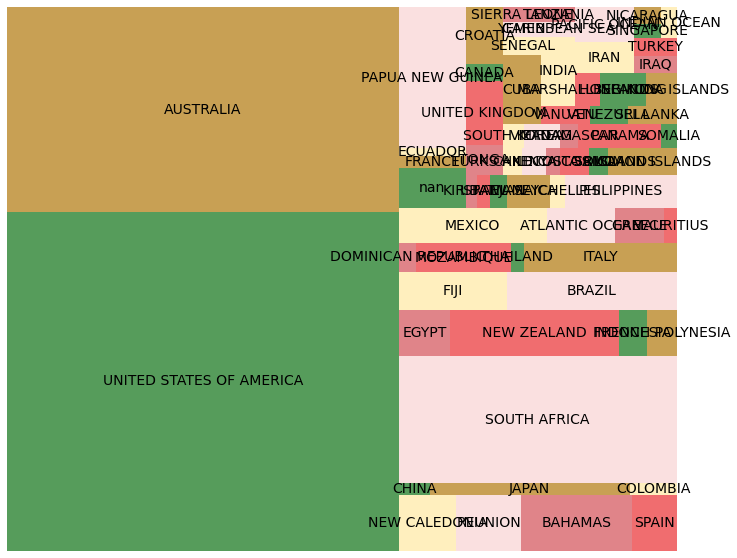

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import squarify

color_list = ['#0f7216', '#b2790c', '#ffe9a3',
              '#f9d4d4', '#d35158', '#ea3033']

fig, ax = plt.subplots(figsize=(12, 10))
plt.rc('font', size=14)
squarify.plot(sizes=Country_repetidos.Freq, label=Country_repetidos.Country,
              color=color_list, alpha=0.7)
plt.axis('off')

plt.show()


#no es el mejor plot, pero nos permite ver como se compone la varaible de un vistazo

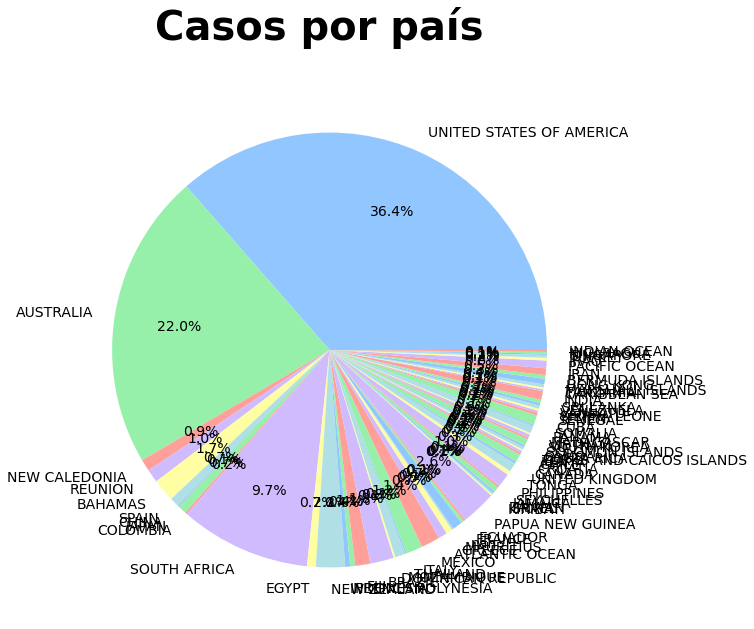

In [ ]:
plt.style.use("seaborn-pastel")

fig, ax = plt.subplots(figsize=(12, 10))

g1 = ax.pie(
    Country_repetidos.Freq,
    labels = Country_repetidos.Country,
    autopct = '%1.1f%%',
    pctdistance = 0.7,
)

#shark['Country'].value_counts().plot(kind='pie', autopct='%.2f', 
#                                            figsize=(12, 12,))

plt.suptitle('Casos por país', fontsize=40, fontweight='bold')
#ax.set_aspect('equal')
#ax.legend(loc='best', title_fontsize = 10)

plt.show()

## *Species*

Para este caso decidimos tomar como referencialas 23 especies que se describen en la pagina del dataset: [(https://www.sharkattackfile.net/species.htm)]

Todos los casos que no podamos encuadra dentro de ellos los asignaremos a otra especie detectable o como no identifcado, entre otros, segun creamos conveniente.

In [ ]:
shark.columns #listamos las columnas

Index(['CaseID', 'Country', 'Species '], dtype='object')

In [ ]:
shark.rename(columns={'Species ': 'Species'}, inplace=True)
list(shark.columns)

['CaseID', 'Country', 'Species']

In [ ]:
shark['Species'] = shark['Species'].fillna('shark') #de la columna shark completamos todos los nulos cn la palbra SHARK, podriamos ponerle "sin especie"
#esta acción la podirmoas poner al principio antes de crear todas las listas y dataframes derivados de la columna "Specie"
shark.head(3)

,CaseID,Country,Species
0,2016.09.18.c,UNITED STATES OF AMERICA,shark
1,2016.09.18.b,UNITED STATES OF AMERICA,shark
2,2016.09.18.a,UNITED STATES OF AMERICA,shark


In [ ]:
shark['Species'] = shark['Species'].str.upper() #convertimos a mayuscula la columna Species de la tabla SHARK
shark.Species.head(3)

0    SHARK
1    SHARK
2    SHARK
Name: Species, dtype: object

In [ ]:
print(len(shark[shark['Species'].str.contains ('SHARK')])) #contamos la cantidad de registros con la palabra shark
#tenemos en total 5991 registros de los cuales 5918 poseen la palabra shark. hay que ver que pasa con esos 73 registros

5919


In [ ]:
shark['Species'].nunique() # de los 5991 registros hay 1524 disitntos

1524

In [ ]:
#Defino una función de reemplazo
def clean_string(astring):
    #limpio los espacios iniciales y finales 
    astring = astring.strip()
    #cambio a mayusculas
    astring = astring.upper()
    #limpio otros caracteres
    maping = {
        ord('?'): ' ', #ord devuelve un entero segun ASCII
        ord(' '): ' ',
        ord(r'['): '',
        ord(r']'): '',
        ord(r'('): '',
        ord(r')'): '',
        ord(r'@'): '',
        ord(r'"'): '',
        ord(r"'"): '',
        ord(r','): '',
        ord(r'.'): '',
        ord(r'/'): '',
        ord(r'*'): '',
        ord(r'+'): '',
        ord(r'-'): '',
        ord(r'<'): '',
        ord(r'>'): '',
        (' A '): ''
    }
    
    astring = astring.translate(maping)
    
    astring = astring.replace(' ', ' ')
    
    return astring

In [ ]:
shark['Species'] = shark['Species'].apply((lambda x: clean_string(x) if type(x) is str else x )) #itero con cada registro apra modificarlos
shark['Species'][1570:1620] #tomo una muestra apra corroborar

1570                                 25 M 825 WHITE SHARK
1571                                        A SMALL SHARK
1572                                 SPECIES UNIDENTIFIED
1573        THOUGHT TO INVOLVE A 2 M 675 GREY NURSE SHARK
1574              THOUGHT TO INVOLVE A 2 M 675 BULL SHARK
1575                                                SHARK
1576                                         BULL SHARK 7
1577                         BRONZE WHALER SHARK 25 M 825
1578               REPORTED TO INVOLVE A HAMMERHEAD SHARK
1579                          WHITE SHARK 4 M WHITE SHARK
1580                                   WOBBEGONG SHARK 1M
1581    SHARK INVOLVEMENT NOT CONFIRMED INJURY MAY BE ...
1582                                           BULL SHARK
1583                                                SHARK
1584                                       BLACKTIP SHARK
1585                     3 M TO 45 M 10 TO 15 WHITE SHARK
1586               24 M TO 3 M 8 TO 10 GREY COLORED SHARK
1587          

In [ ]:
shark['Species'].nunique() #contamos casos unicos
#pasamos de 1524 a 1400

1400

In [ ]:
shark['Species'] = shark['Species'].str.rstrip() #eliminamos espacios vacios de la derecha
shark['Species'] = shark['Species'].str.lstrip() #eliminamos espacios vacios de la izquierda
shark[1570:1600]

,CaseID,Country,Species
1570,2003.02.27,NEW ZEALAND,25 M 825 WHITE SHARK
1571,2003.02.15.b,AUSTRALIA,A SMALL SHARK
1572,2003.02.15.a,UNITED STATES OF AMERICA,SPECIES UNIDENTIFIED
1573,2003.02.11,AUSTRALIA,THOUGHT TO INVOLVE A 2 M 675 GREY NURSE SHARK
1574,2003.02.08,AUSTRALIA,THOUGHT TO INVOLVE A 2 M 675 BULL SHARK
1575,2003.01.17,SOUTH AFRICA,SHARK
1576,2003.01.03,COSTA RICA,BULL SHARK 7
1577,2003.01.02,AUSTRALIA,BRONZE WHALER SHARK 25 M 825
1578,2002.12.29,AUSTRALIA,REPORTED TO INVOLVE A HAMMERHEAD SHARK
1579,2002.12.24,SOUTH AFRICA,WHITE SHARK 4 M WHITE SHARK


Una de las especies declaradas es BRONZE WHALER, empezamos porv er si podemos filtrarlas y convertirlas a un valor comun

In [ ]:
shark2 = shark.drop(['Country'],
                     axis=1)
BRONZE = shark2[shark2.Species.str.contains ('BRONZE', case = False)] #creo un df con solo los casos bronze
list(BRONZE['Species'])

['BRONZE WHALER SHARKS X 3',
 'BRONZE WHALER',
 'BRONZE WHALER SHARK 6',
 'BRONZE WHALER SHARK 15M',
 'BRONZE WHALER SHARK 15M',
 'BRONZE WHALER SHARK 25M',
 'BRONZE WHALER SHARK 3M',
 'WHITE SHARK OR BRONZE WHALER',
 'POSSIBLY A BRONZE WHALER SHARK',
 'THOUGHT TO INVOLVE A BRONZE WHALE SHARK 2M',
 'BRONZE WHALER SHARK',
 'BRONZE WHALER SHARK',
 'BRONZE WHALER SHARK',
 'BRONZE WHALER SHARK',
 'BRONZE WHALER SHARK 4M',
 'BRONZE WHALER SHARK',
 'BRONZE WHALER SHARK 15 M',
 'BRONZE WHALER SHARK 6',
 'BRONZE WHALER SHARK A  JUVENILE',
 'BRONZE WHALER SHARK 2 M',
 'BRONZE WHALER SHARK',
 'BRONZE WHALER SHARK',
 'BRONZE WHALER SHARK 43 M 14',
 'BRONZE WHALER SHARK 2 M TO 3 M 675 TO 10',
 'BRONZE WHALER SHARK 24 M 8',
 'BRONZE WHALER SHARK 25 M 825',
 'BRONZE WHALER SHARK',
 'BRONZE WHALER SHARK 15 M 5',
 '15 M 5 SHARK EITHER A BRONZE WHALER OR A GREY NURSE SHARK',
 'BRONZE WHALER SHARK 25 M 825',
 'BRONZE WHALER SHARK',
 'BRONZE WHALER SHARK',
 'BRONZE WHALER SHARK',
 'BRONZE WHALER SHARK 25

In [ ]:
BRONZE['Species'] = 'BRONZE WHALER' #todos esos casos los reemplazo por una etiqueta
BRONZE

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,CaseID,Species
54,2016.06.02.b,BRONZE WHALER
85,2016.03.03.R,BRONZE WHALER
106,2015.12.21.b,BRONZE WHALER
166,2015.07.23.a,BRONZE WHALER
323,2014.06.09.a,BRONZE WHALER
...,...,...
3770,1960.04.22,BRONZE WHALER
3776,1960.04.03.a,BRONZE WHALER
3784,1960.02.27.b,BRONZE WHALER
4078,1955.02.05,BRONZE WHALER


In [ ]:
# Hago mismo para el resto de las especies.
WHITE =shark2[shark2.Species.str.contains('WHITE')]
TIGER =shark2[shark2.Species.str.contains('TIGER')]
BULL =shark2[shark2.Species.str.contains('BULL')]
SHORTFIN_MAKO =shark2[shark2.Species.str.contains(r'((SHORTFIN MAKO)|(SHORFTIN)|(MAKO))')]
LEMON =shark2[shark2.Species.str.contains('LEMON')]
OCEANIC_WHITETIP =shark2[shark2.Species.str.contains(r'((TIP)|(WHITE)|(OCEANIC))')]
BLUE =shark2[shark2.Species.str.contains('BLUE')]
GALAPAGOS =shark2[shark2.Species.str.contains('GALAPAGOS')]
CARIBBEAN_REEF =shark2[shark2.Species.str.contains(r'CARIBBEAN')]
DUSKY =shark2[shark2.Species.str.contains('DUSKY')]
BLACKTIP =shark2[shark2.Species.str.contains('BLACKTIP')]
SILKY =shark2[shark2.Species.str.contains('SILKY')]
GRAY_REEF =shark2[shark2.Species.str.contains('((GRAY)|(REEF)|(GREY))')]
GREAT_HAMMERHEAD =shark2[shark2.Species.str.contains(r'((GREAT)|(HAMMERHEAD)|(HAMMER))')]
BLACKTIP_REEF =shark2[shark2.Species.str.contains('BLACKTIP')]
BROADNOSE_SEVENGILL =shark2[shark2.Species.str.contains(r'((BROADNOSE)|(SEVENGILL))')]
BLUNTNOSE_SIXGILL =shark2[shark2.Species.str.contains(r'((BLUNTNOSE)|(SIXGILL))')]
NURSE =shark2[shark2.Species.str.contains('NURSE')]
SAND_TIGER=shark2[shark2.Species.str.contains(r'((SAND)|(TIGER))')]
WOBBEGONG=shark2[shark2.Species.str.contains('WOBBEGONG')]
BASKING =shark2[shark2.Species.str.contains('BASKING')]
SPINNER =shark2[shark2.Species.str.contains('SPINNER')]
JUVENILE =shark2[shark2.Species.str.contains('JUVENILE')]
UNCONFIRMED =shark2[shark2.Species.str.contains(r'((UNCORFIRMED)|(NOT AUTHENTICATED)|(NOT CONFIRMED)|(SUSPECTED)|(PROBABLE)|(QUESTIONABLE))')]
NOT_SHARK =shark2[shark2.Species.str.contains(r'((NO SHARK INVOLVEMENT)|(NOT A SHARK ATTACK)|(INVOLVEMENT UNCONFIRMED))')]
UNCONFIRMED_SPECIE =shark2[shark2.Species.str.contains(r'((UNIDENTIFIED)|(UNKNOWN))')]
SMALL =shark2[shark2.Species.str.contains(r'((LITTLE)|(SMALL))')]
LARGE =shark2[shark2.Species.str.contains(r'((LONG)|(LARGE))')]
DOG =shark2[shark2.Species.str.contains('DOG')]
RAGGEDTOOTH =shark2[shark2.Species.str.contains('RAGGEDTOOTH')]
PORBEAGLE =shark2[shark2.Species.str.contains('PORBEAGLE')]

/usr/local/lib/python3.7/dist-packages/pandas/core/strings.py:2001: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


In [ ]:
WHITE ['Species']='WHITE' 
TIGER ['Species']='TIGER' 
BULL ['Species']='BULL' 
SHORTFIN_MAKO ['Species']='SHORTFIN MAKO' 
LEMON ['Species']='LEMON' 
OCEANIC_WHITETIP ['Species']='OCEANIC WHITETIP' 
BLUE ['Species']='BLUE' 
GALAPAGOS ['Species']='GALAPAGOS' 
CARIBBEAN_REEF ['Species']='CARIBBEAN REEF' 
DUSKY ['Species']='DUSKY'
BLACKTIP ['Species']='BLACKTIP'
SILKY ['Species']='SILKY '
GRAY_REEF ['Species']='GRAY REEF' 
GREAT_HAMMERHEAD ['Species']='GREAT HAMMERHEAD'
BLACKTIP_REEF ['Species']='BLACKTIP REEF '
BROADNOSE_SEVENGILL ['Species']='BROADNOSE SEVENGILL' 
BLUNTNOSE_SIXGILL ['Species']='BLUNTNOSE SIXGILL' 
NURSE ['Species']='NURSE' 
SAND_TIGER['Species']='SAND TIGER'
WOBBEGONG['Species']='WOBBEGONG'
BASKING ['Species']='BASKING' 
SPINNER ['Species']='SPINNER' 
JUVENILE ['Species'] = 'JUVENILE'
UNCONFIRMED['Species']= 'UNCONFIRMED'
NOT_SHARK['Species']= 'NOT SHARK'
UNCONFIRMED_SPECIE['Species'] = 'UNCONFIRMED SPECIE'
SMALL['Species'] = 'SMALL'
LARGE['Species'] = 'LARGE'
DOG['Species'] = 'DOG'
RAGGEDTOOTH['Species'] = 'RAGGEDTOOTH'
PORBEAGLE['Species'] = 'PORBEAGLE'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [ ]:
UNCONFIRMED_SPECIE #tiro una consluta para corroborar que haya traido registros bien
UNCONFIRMED_SPECIE.count() #hago conteo de registros

CaseID     19
Species    19
dtype: int64

In [ ]:
result_merge = pd.merge(shark,
                  BRONZE,
                  left_on='CaseID',
                  right_on='CaseID',
                  how='outer')
result_merge = pd.merge(result_merge,
                  WHITE,
                  left_on='CaseID',
                  right_on='CaseID',
                  how='outer')
result_merge = pd.merge(result_merge,
                  TIGER,
                  left_on='CaseID',
                  right_on='CaseID',
                  how='outer')
result_merge = pd.merge(result_merge,
                  BULL,
                  left_on='CaseID',
                  right_on='CaseID',
                  how='outer')
result_merge = pd.merge(result_merge,
                  SHORTFIN_MAKO,
                  left_on='CaseID',
                  right_on='CaseID',
                  how='outer')
result_merge = pd.merge(result_merge,
                  LEMON,
                  left_on='CaseID',
                  right_on='CaseID',
                  how='outer')
result_merge = pd.merge(result_merge,
                  OCEANIC_WHITETIP,
                  left_on='CaseID',
                  right_on='CaseID',
                  how='outer') 
result_merge = pd.merge(result_merge,
                  BLUE,
                  left_on='CaseID',
                  right_on='CaseID',
                  how='outer')
result_merge = pd.merge(result_merge,
                  GALAPAGOS,
                  left_on='CaseID',
                  right_on='CaseID',
                  how='outer')
result_merge = pd.merge(result_merge,
                  CARIBBEAN_REEF,
                  left_on='CaseID',
                  right_on='CaseID',
                  how='outer') 
result_merge = pd.merge(result_merge,
                  DUSKY,
                  left_on='CaseID',
                  right_on='CaseID',
                  how='outer') 
result_merge = pd.merge(result_merge,
                  BLACKTIP,
                  left_on='CaseID',
                  right_on='CaseID',
                  how='outer') 
result_merge = pd.merge(result_merge,
                  SILKY,
                  left_on='CaseID',
                  right_on='CaseID',
                  how='outer')
result_merge = pd.merge(result_merge,
                  GRAY_REEF,
                  left_on='CaseID',
                  right_on='CaseID',
                  how='outer')
result_merge = pd.merge(result_merge,
                  GREAT_HAMMERHEAD,
                  left_on='CaseID',
                  right_on='CaseID',
                  how='outer')
result_merge = pd.merge(result_merge,
                  BLUE,
                  left_on='CaseID',
                  right_on='CaseID',
                  how='outer')
result_merge = pd.merge(result_merge,
                  BLACKTIP_REEF,
                  left_on='CaseID',
                  right_on='CaseID',
                  how='outer')
result_merge = pd.merge(result_merge,
                  BROADNOSE_SEVENGILL,
                  left_on='CaseID',
                  right_on='CaseID',
                  how='outer')
result_merge = pd.merge(result_merge,
                  BLUNTNOSE_SIXGILL,
                  left_on='CaseID',
                  right_on='CaseID',
                  how='outer')
result_merge = pd.merge(result_merge,
                  NURSE,
                  left_on='CaseID',
                  right_on='CaseID',
                  how='outer')
result_merge = pd.merge(result_merge,
                  SAND_TIGER,
                  left_on='CaseID',
                  right_on='CaseID',
                  how='outer')
result_merge = pd.merge(result_merge,
                  WOBBEGONG,
                  left_on='CaseID',
                  right_on='CaseID',
                  how='outer')
result_merge = pd.merge(result_merge,
                  BASKING,
                  left_on='CaseID',
                  right_on='CaseID',
                  how='outer')
result_merge = pd.merge(result_merge,
                  SPINNER,
                  left_on='CaseID',
                  right_on='CaseID',
                  how='outer')
result_merge = pd.merge(result_merge,
                  UNCONFIRMED,
                  left_on='CaseID',
                  right_on='CaseID',
                  how='outer')
result_merge = pd.merge(result_merge,
                  UNCONFIRMED_SPECIE,
                  left_on='CaseID',
                  right_on='CaseID',
                  how='outer')
result_merge = pd.merge(result_merge,
                  NOT_SHARK,
                  left_on='CaseID',
                  right_on='CaseID',
                  how='outer')
result_merge = pd.merge(result_merge,
                  SMALL,
                  left_on='CaseID',
                  right_on='CaseID',
                  how='outer')
result_merge = pd.merge(result_merge,
                  LARGE,
                  left_on='CaseID',
                  right_on='CaseID',
                  how='outer')
result_merge = pd.merge(result_merge,
                  DOG,
                  left_on='CaseID',
                  right_on='CaseID',
                  how='outer')
result_merge = pd.merge(result_merge,
                  PORBEAGLE,
                  left_on='CaseID',
                  right_on='CaseID',
                  how='outer')
result_merge = pd.merge(result_merge,
                  RAGGEDTOOTH,
                  left_on='CaseID',
                  right_on='CaseID',
                  how='outer')

#hacemos outer join con los vectores creados

In [ ]:
result_merge[70:100] #hago consulta para corroborar merge

,CaseID,Country,Species_x,Species_y,Species_x,Species_y,Species_x,Species_y,Species_x,Species_y,Species_x,Species_y,Species_x,Species_y,Species_x,Species_y,Species_x,Species_y,Species_x,Species_y,Species_x,Species_y,Species_x,Species_y,Species_x,Species_y,Species_x,Species_y,Species_x,Species_y,Species_x,Species_y,Species_x,Species_y,Species
70,2016.04.18,FRENCH POLYNESIA,GREY REEF SHARK 2 M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GRAY REEF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
71,2016.04.13,UNITED STATES OF AMERICA,BULL SHARK 7,NaN,NaN,NaN,BULL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
72,2016.04.09,NEW CALEDONIA,TIGER SHARK 25 M,NaN,NaN,TIGER,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SAND TIGER,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
73,2016.04.08,CAPE VERDE,SHARK INVOLVEMENT NOT CONFIRMED,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,UNCONFIRMED,NaN,NaN,NaN,NaN,NaN,NaN,NaN
74,2016.04.07.b,UNITED STATES OF AMERICA,5 TO 6 SHARK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75,2016.04.07.a,UNITED STATES OF AMERICA,SHARK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
76,2016.03.31,UNITED STATES OF AMERICA,SHARK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
77,2016.03.30,AUSTRALIA,SHARK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
78,2016.03.28.b,UNITED STATES OF AMERICA,SHARK INVOLVEMENT NOT CONFIRMED,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,UNCONFIRMED,NaN,NaN,NaN,NaN,NaN,NaN,NaN
79,2016.03.28.a,AUSTRALIA,SHARK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
list(result_merge.columns)#vemos que nos quedan columnas identicas en nombres

['CaseID',
 'Country',
 'Species_x',
 'Species_y',
 'Species_x',
 'Species_y',
 'Species_x',
 'Species_y',
 'Species_x',
 'Species_y',
 'Species_x',
 'Species_y',
 'Species_x',
 'Species_y',
 'Species_x',
 'Species_y',
 'Species_x',
 'Species_y',
 'Species_x',
 'Species_y',
 'Species_x',
 'Species_y',
 'Species_x',
 'Species_y',
 'Species_x',
 'Species_y',
 'Species_x',
 'Species_y',
 'Species_x',
 'Species_y',
 'Species_x',
 'Species_y',
 'Species_x',
 'Species_y',
 'Species']

In [ ]:
#cambiamos el nombre de las columnas
result_merge.columns = ['id', 'specie_campo_original', 'a', 'b', 'c', 'd', 'e','f','g','h','i','j','k','l','m','n','o','p','q','r','s','t','u','v','x','y','z','aa','ab','ac','ad','ae','af', 'ag', 'ah']
result_merge.head(5) #hacemos una consulta para corroborar que este ok el cambio

,id,specie_campo_original,a,b,c,d,e,f,g,h,i,j,k,l,m,n,o,p,q,r,s,t,u,v,x,y,z,aa,ab,ac,ad,ae,af,ag,ah
0,2016.09.18.c,UNITED STATES OF AMERICA,SHARK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2016.09.18.b,UNITED STATES OF AMERICA,SHARK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2016.09.18.a,UNITED STATES OF AMERICA,SHARK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2016.09.17,AUSTRALIA,SHARK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2016.09.15,AUSTRALIA,2 M SHARK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
result_merge = result_merge.fillna('0') #rellenamos os nulos con un 0, como string
result_merge[600:605]

,id,specie_campo_original,a,b,c,d,e,f,g,h,i,j,k,l,m,n,o,p,q,r,s,t,u,v,x,y,z,aa,ab,ac,ad,ae,af,ag,ah
600,2012.01.18.b,TAIWAN,BLUE SHARK 70KG BLUE SHARK,0,0,0,0,0,0,0,BLUE,0,0,0,0,0,0,0,BLUE,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
601,2012.01.18.a,AUSTRALIA,WHITE SHARK 27 M,0,WHITE,0,0,0,0,OCEANIC WHITETIP,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
602,2012.01.15,SOUTH AFRICA,THOUGHT TO INVOLVE A BULL SHARK,0,0,0,BULL,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
603,2012.01.13,UNITED STATES OF AMERICA,WHITE SHARK,0,WHITE,0,0,0,0,OCEANIC WHITETIP,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
604,2012.01.03,AUSTRALIA,2 M SHARK,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
result_merge["Specie_new"] = result_merge['a'] + result_merge['b'] + result_merge['c'] + result_merge['d'] + result_merge['e'] + result_merge['f']  +result_merge['g'] + result_merge['h'] + result_merge['i'] + result_merge['j'] + result_merge['k'] + result_merge['l'] + result_merge['m'] + result_merge['n'] + result_merge['o'] + result_merge['p'] + result_merge['q'] + result_merge['r'] + result_merge['s'] + result_merge['t'] + result_merge['u'] + result_merge['v'] + result_merge['x'] + result_merge['y'] + result_merge['z'] + result_merge['ab'] + result_merge['ab']
result_merge[600:605] #corroboramos la composición de la columna

,id,specie_campo_original,a,b,c,d,e,f,g,h,i,j,k,l,m,n,o,p,q,r,s,t,u,v,x,y,z,aa,ab,ac,ad,ae,af,ag,ah,Specie_new
600,2012.01.18.b,TAIWAN,BLUE SHARK 70KG BLUE SHARK,0,0,0,0,0,0,0,BLUE,0,0,0,0,0,0,0,BLUE,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,BLUE SHARK 70KG BLUE SHARK0000000BLUE0000000BL...
601,2012.01.18.a,AUSTRALIA,WHITE SHARK 27 M,0,WHITE,0,0,0,0,OCEANIC WHITETIP,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,WHITE SHARK 27 M0WHITE0000OCEANIC WHITETIP0000...
602,2012.01.15,SOUTH AFRICA,THOUGHT TO INVOLVE A BULL SHARK,0,0,0,BULL,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,THOUGHT TO INVOLVE A BULL SHARK000BULL00000000...
603,2012.01.13,UNITED STATES OF AMERICA,WHITE SHARK,0,WHITE,0,0,0,0,OCEANIC WHITETIP,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,WHITE SHARK0WHITE0000OCEANIC WHITETIP000000000...
604,2012.01.03,AUSTRALIA,2 M SHARK,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2 M SHARK00000000000000000000000000


In [ ]:
result_merge.head() #corroboramos que los casos que no se encuentran dentro de alguna clasificación poseen una cadena  de '0'

,id,specie_campo_original,a,b,c,d,e,f,g,h,i,j,k,l,m,n,o,p,q,r,s,t,u,v,x,y,z,aa,ab,ac,ad,ae,af,ag,ah,Specie_new
0,2016.09.18.c,UNITED STATES OF AMERICA,SHARK,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,SHARK00000000000000000000000000
1,2016.09.18.b,UNITED STATES OF AMERICA,SHARK,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,SHARK00000000000000000000000000
2,2016.09.18.a,UNITED STATES OF AMERICA,SHARK,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,SHARK00000000000000000000000000
3,2016.09.17,AUSTRALIA,SHARK,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,SHARK00000000000000000000000000
4,2016.09.15,AUSTRALIA,2 M SHARK,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2 M SHARK00000000000000000000000000


In [ ]:
result_merge_fin = result_merge.loc[:,('id', 'Specie_new')]
result_merge_fin.head()

,id,Specie_new
0,2016.09.18.c,SHARK00000000000000000000000000
1,2016.09.18.b,SHARK00000000000000000000000000
2,2016.09.18.a,SHARK00000000000000000000000000
3,2016.09.17,SHARK00000000000000000000000000
4,2016.09.15,2 M SHARK00000000000000000000000000


In [ ]:
notype = result_merge_fin['Specie_new'] == '000000000000000000000000000'
notype

0       False
1       False
2       False
3       False
4       False
        ...  
5987    False
5988    False
5989    False
5990    False
5991    False
Name: Specie_new, Length: 5992, dtype: bool

In [ ]:
result_merge_fin['Specie_new'] = result_merge_fin['Specie_new'].str.replace('0', ' ')

In [ ]:
result_merge_fin['Specie_new'].value_counts()

SHARK                                                                                                                                                 2934
WHITE SHARK WHITE    OCEANIC WHITETIP                                                                                                                  167
SHARK INVOLVEMENT NOT CONFIRMED                                                                                                                         81
TIGER SHARK  TIGER                 SAND TIGER                                                                                                           75
BULL SHARK   BULL                                                                                                                                       57
                                                                                                                                                      ... 
POSSIBLY  A BLACKTIP OR SPINNER SHARK      OCEANIC WHITETIP    BLACKTI

In [ ]:
result_merge_fin['Specie_new'] = result_merge_fin['Specie_new'].str.rstrip() #eliminamos espacios vacios de la derecha
result_merge_fin['Specie_new'] = result_merge_fin['Specie_new'].str.lstrip() # eliminamos espacios vacios de la izquie

In [ ]:
result_merge_fin.fillna('NO_TYPE')
result_merge_fin['Specie_new'].value_counts()

SHARK                                               2934
WHITE SHARK WHITE    OCEANIC WHITETIP                167
SHARK INVOLVEMENT NOT CONFIRMED                       81
TIGER SHARK  TIGER                 SAND TIGER         75
BULL SHARK   BULL                                     57
                                                    ... 
NOT AUTHENTICATED                                      1
6 1  LB SHARK                                          1
REEF SHARK 18M             GRAY REEF                   1
5 M TO 7 M WHITE SHARK WHITE    OCEANIC WHITETIP       1
RAGGEDTOOTH SHARK 1  LB                                1
Name: Specie_new, Length: 1378, dtype: int64

In [ ]:
result_merge_fin['Specie_new'] = result_merge_fin['Specie_new'].replace(to_replace='000000000000000000000000000', value='NO TYPE', regex=True)
result_merge_fin['Specie_new'].value_counts()

SHARK                                               2934
WHITE SHARK WHITE    OCEANIC WHITETIP                167
SHARK INVOLVEMENT NOT CONFIRMED                       81
TIGER SHARK  TIGER                 SAND TIGER         75
BULL SHARK   BULL                                     57
                                                    ... 
NOT AUTHENTICATED                                      1
6 1  LB SHARK                                          1
REEF SHARK 18M             GRAY REEF                   1
5 M TO 7 M WHITE SHARK WHITE    OCEANIC WHITETIP       1
RAGGEDTOOTH SHARK 1  LB                                1
Name: Specie_new, Length: 1378, dtype: int64

In [ ]:
result_merge_fin['Specie_new'] = result_merge_fin['Specie_new'].str.replace('0', '')
result_merge_fin['Specie_new'].value_counts()

SHARK                                               2934
WHITE SHARK WHITE    OCEANIC WHITETIP                167
SHARK INVOLVEMENT NOT CONFIRMED                       81
TIGER SHARK  TIGER                 SAND TIGER         75
BULL SHARK   BULL                                     57
                                                    ... 
NOT AUTHENTICATED                                      1
6 1  LB SHARK                                          1
REEF SHARK 18M             GRAY REEF                   1
5 M TO 7 M WHITE SHARK WHITE    OCEANIC WHITETIP       1
RAGGEDTOOTH SHARK 1  LB                                1
Name: Specie_new, Length: 1378, dtype: int64

In [ ]:
result10 = {}
for item in result_merge_fin.Specie_new:
    if item not in result10.keys():
        result10[item] = 1
    else:
        result10[item] += 1
#devuelve el caso con el numero de frecuencia

result10 = pd.DataFrame(result10, index=[0]) #creo DF

result10 = pd.melt(result10) #pivoteo la tabla

result10.rename(columns={'value': 'Freq'}, inplace=True)

result10.rename(columns={'variable': 'Species'}, inplace=True) #renombro las cols

Species_repetidos = result10[result10.Freq > 10] #seleccionamos solo los casos mayores a 10
print(Species_repetidos)

print('casos repetidos: ', Species_repetidos.count())

                                               Species  Freq
0                                                SHARK  2934
1                                            2 M SHARK    23
2                                         3 TO 4 SHARK    18
4                WHITE SHARK WHITE    OCEANIC WHITETIP   167
7    BLACKTIP SHARK      OCEANIC WHITETIP    BLACKT...    15
8                     BLUE SHARK       BLUE       BLUE    16
17                                             5 SHARK    25
18                                             3 SHARK    26
20                                           3 M SHARK    18
21                         MAKO SHARK    SHORTFIN MAKO    15
27       WOBBEGONG SHARK                     WOBBEGONG    23
31                     SHARK INVOLVEMENT NOT CONFIRMED    81
36                                NO SHARK INVOLVEMENT    21
46                                   BULL SHARK   BULL    57
54                                        4 TO 5 SHARK    23
59                      

In [ ]:
group_data = list(Species_repetidos.Freq) #creamos,lista de frecuencias
group_names = list(Species_repetidos.Species) #creamos lista de etiquetas
group_mean = np.mean(group_data) #calculamos la media apra ese grupo
print('freq:', group_data)
print('lab:', group_names)
print('media:', group_mean)

freq: [2934, 23, 18, 167, 15, 16, 25, 26, 18, 15, 23, 81, 21, 57, 23, 40, 40, 13, 75, 14, 29, 11, 14, 13, 13, 13, 14, 14, 15, 11, 14, 12, 38, 13, 23, 17, 27, 14, 13, 32, 16]
lab: ['SHARK', '2 M SHARK', '3 TO 4 SHARK', 'WHITE SHARK WHITE    OCEANIC WHITETIP', 'BLACKTIP SHARK      OCEANIC WHITETIP    BLACKTIP    BLACKTIP REEF', 'BLUE SHARK       BLUE       BLUE', '5 SHARK', '3 SHARK', '3 M SHARK', 'MAKO SHARK    SHORTFIN MAKO', 'WOBBEGONG SHARK                     WOBBEGONG', 'SHARK INVOLVEMENT NOT CONFIRMED', 'NO SHARK INVOLVEMENT', 'BULL SHARK   BULL', '4 TO 5 SHARK', '4 SHARK', '6 SHARK', 'SMALL SHARK', 'TIGER SHARK  TIGER                 SAND TIGER', '15 M SHARK', 'A SMALL SHARK', '1 M SHARK', '7 SHARK', 'NURSE SHARK                   NURSE', '1  SHARK', 'GREY NURSE SHARK             GRAY REEF     NURSE', 'RAGGEDTOOTH SHARK', 'ZAMBESI SHARK', 'BRONZE WHALER SHARKBRONZE WHALER', 'SAND SHARK                    SAND TIGER', '12 SHARK', '4 M 13 WHITE SHARK WHITE    OCEANIC WHITETIP', '18

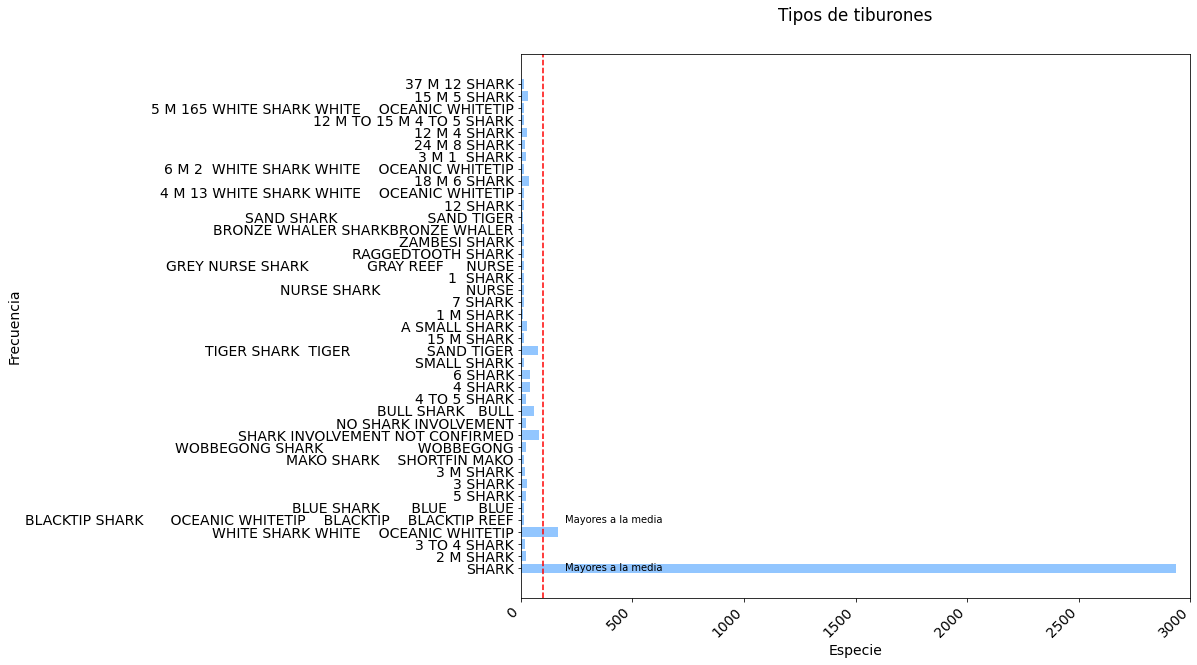

In [ ]:
fig, ax = plt.subplots(figsize=(12, 10)) #configuramos tamaño del plot
ax.barh(group_names, group_data) #nombre de los eje
labels = ax.get_xticklabels() #etiquetas
plt.setp(labels, rotation=45, horizontalalignment='right') #posicion de etiquetas del eje x y rotación

ax.axvline(group_mean, ls='--', color='r') #dibujamos la media

# creamos etiqueta para casos amyores, en este caso son 2, en la posición 0 y 4
for group in [0,4]:
    ax.text(200, group, "Mayores a la media", fontsize=10,
            verticalalignment="center")

# movemos el titulo para que quede centrado con el grfico
ax.title.set(y=1.05)

ax.set(xlim=[0, 3000], xlabel='Especie', ylabel='Frecuencia', #seteamos limite del eje
       title='Tipos de tiburones')

plt.show()

In [ ]:
#repetimos el procesos pero excluyendoo la categorica generica "SHARK"
Species_repetidos2 = Species_repetidos[Species_repetidos.Freq < 500] 
group_data2 = list(Species_repetidos2.Freq)
group_names2 = list(Species_repetidos2.Species)
group_mean2 = np.mean(group_data)
print('freq:', group_data2)
print('lab:', group_names2)
print('media:', group_mean2)

freq: [23, 18, 167, 15, 16, 25, 26, 18, 15, 23, 81, 21, 57, 23, 40, 40, 13, 75, 14, 29, 11, 14, 13, 13, 13, 14, 14, 15, 11, 14, 12, 38, 13, 23, 17, 27, 14, 13, 32, 16]
lab: ['2 M SHARK', '3 TO 4 SHARK', 'WHITE SHARK WHITE    OCEANIC WHITETIP', 'BLACKTIP SHARK      OCEANIC WHITETIP    BLACKTIP    BLACKTIP REEF', 'BLUE SHARK       BLUE       BLUE', '5 SHARK', '3 SHARK', '3 M SHARK', 'MAKO SHARK    SHORTFIN MAKO', 'WOBBEGONG SHARK                     WOBBEGONG', 'SHARK INVOLVEMENT NOT CONFIRMED', 'NO SHARK INVOLVEMENT', 'BULL SHARK   BULL', '4 TO 5 SHARK', '4 SHARK', '6 SHARK', 'SMALL SHARK', 'TIGER SHARK  TIGER                 SAND TIGER', '15 M SHARK', 'A SMALL SHARK', '1 M SHARK', '7 SHARK', 'NURSE SHARK                   NURSE', '1  SHARK', 'GREY NURSE SHARK             GRAY REEF     NURSE', 'RAGGEDTOOTH SHARK', 'ZAMBESI SHARK', 'BRONZE WHALER SHARKBRONZE WHALER', 'SAND SHARK                    SAND TIGER', '12 SHARK', '4 M 13 WHITE SHARK WHITE    OCEANIC WHITETIP', '18 M 6 SHARK', '6

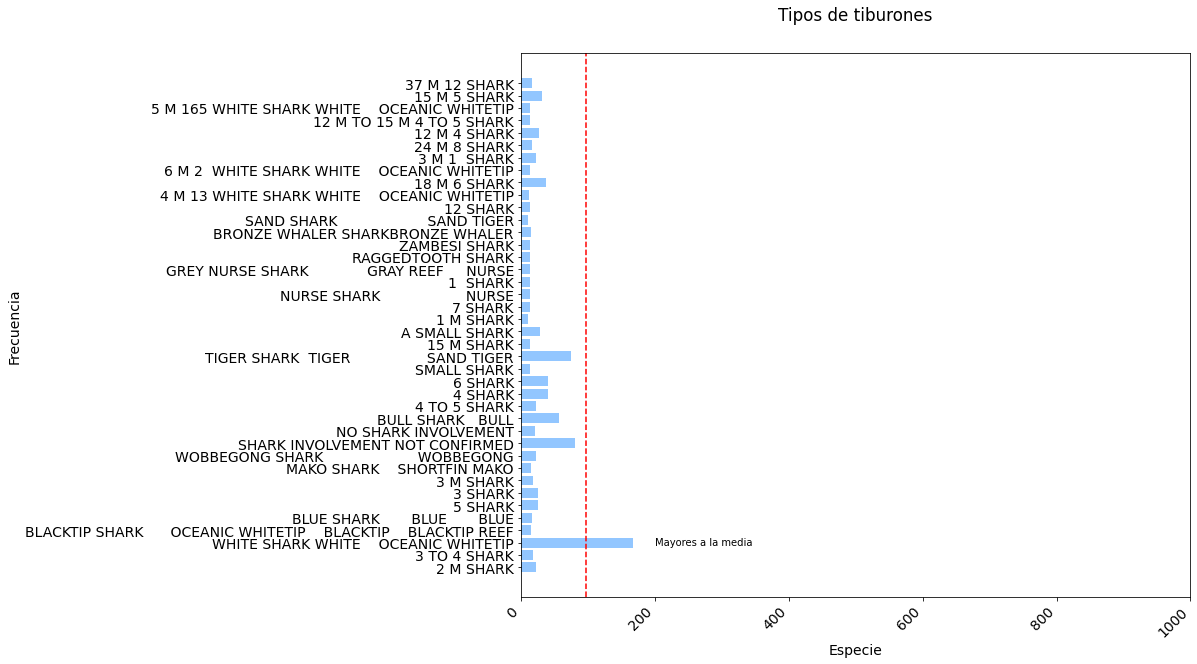

In [ ]:
fig, ax = plt.subplots(figsize=(12, 10))
ax.barh(group_names2, group_data2)
labels = ax.get_xticklabels()
plt.setp(labels, rotation=45, horizontalalignment='right')

ax.axvline(group_mean, ls='--', color='r')

for group in [2]:
    ax.text(200, group, "Mayores a la media", fontsize=10,
            verticalalignment="center")

ax.title.set(y=1.05)

ax.set(xlim=[0, 1000], xlabel='Especie', ylabel='Frecuencia',
       title='Tipos de tiburones')

plt.show()

Lo malo del analisis y el eTL de `Species` es que cuando creamos los grupos existian registros con campos que por ejemplo decian: *WHITE SHARK OR BLUE SHARK*, en esos casos un mismo registro perteneceria a dos grupos, entonces de esa forma obtenemos en la suma total mas cantida de registros que los del data set original.